In [10]:
import pandas as pd
from ase.visualize import view as view_molecule
from ase.io import read as read_molecule
import ase
import numpy as np
import random


from ase.cell import Cell
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, MBTR

In [2]:
DATA_PATH = './nomad2018-predict-transparent-conductors'


In [3]:
train_data = pd.read_csv(
    f'{DATA_PATH}/train.csv')
train_data


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


In [4]:
test_data = pd.read_csv(
    f'{DATA_PATH}/test.csv')
test_data



,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,12,80.0,0.0000,0.5938,0.4062,24.8145,6.3964,6.2933,90.0002,104.7733,90.0001
596,597,33,40.0,0.1250,0.0000,0.8750,5.5783,9.4849,10.1107,90.0008,89.9967,90.0004
597,598,194,80.0,0.0000,0.2500,0.7500,6.9377,6.9372,25.0641,90.0072,89.9880,119.9857
598,599,33,40.0,0.6250,0.0000,0.3750,5.1841,8.8659,9.4956,90.0041,90.0009,90.0007


# Visualising the molecule

In [11]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            noise = np.array(
                [random.random()*0.001, random.random()*0.001, random.random()*0.001])
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=float)+noise, x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=float))
    return pos_data, np.array(lat_data)


xyzdata = get_xyz_data(f'{DATA_PATH}/train/10/geometry.xyz')
pos_data = xyzdata[0]
atoms = [ase.Atom(symbol=sym, position=pos) for pos, sym in pos_data]
mol = ase.Atoms(atoms)
# unlike jmol, the bonds are not automatically computed.
# hence, it does not look the same.
view_molecule(mol, viewer='x3d')


# Adding new features to the training data
- CoulombMatrix
- SineMatrix
- EwaldSumMatrix

In [12]:
np.array([1,2,3])+np.array([1,2,3])

array([2, 4, 6])

In [13]:
def get_xyz_data(filename):
    pos_data = []
    lat_data = []
    with open(filename) as f:
        for line in f.readlines():
            x = line.split()
            if x[0] == 'atom':
                pos_data.append([np.array(x[1:4], dtype=float), x[4]])
            elif x[0] == 'lattice_vector':
                lat_data.append(np.array(x[1:4], dtype=float))
    return pos_data, np.array(lat_data)


get_xyz_data(f'{DATA_PATH}/train/10/geometry.xyz')


([[array([-0.05487074, -0.02429496,  5.9479779 ]), 'Ga'],
  [array([-0.16461223, -0.07288488, 17.84393368]), 'Al'],
  [array([4.59925077, 2.74195764, 6.00133319]), 'Ga'],
  [array([ 4.48950929,  2.69336772, 17.89728898]), 'Ga'],
  [array([3.07074593, 0.01523894, 5.9770041 ]), 'Ga'],
  [array([ 2.96100444, -0.03335098, 17.87295989]), 'Ga'],
  [array([1.4736341 , 2.70242374, 5.97230698]), 'Ga'],
  [array([ 1.36389262,  2.65383382, 17.86826277]), 'Al'],
  [array([0., 0., 0.]), 'Ga'],
  [array([-0.10974148, -0.04858992, 11.89595579]), 'Ga'],
  [array([4.65412151, 2.7662526 , 0.05335529]), 'Ga'],
  [array([ 4.54438003,  2.71766268, 11.94931108]), 'Al'],
  [array([3.12561667, 0.0395339 , 0.0290262 ]), 'Ga'],
  [array([ 3.01587519e+00, -9.05602000e-03,  1.19249820e+01]), 'Al'],
  [array([1.52850484, 2.7267187 , 0.02432909]), 'Al'],
  [array([ 1.41876336,  2.67812878, 11.92028488]), 'Ga'],
  [array([-0.05030208,  1.79230656,  2.98053228]), 'Ga'],
  [array([-0.16004356,  1.74371664, 14.87648807

In [14]:
n_atoms_max = int(train_data['number_of_total_atoms'].max())
n_atoms_max

80

In [15]:
molecules = []
for idx in train_data['id']:
    path = f'{DATA_PATH}/train/{idx}/geometry.xyz'
    xyz_data = get_xyz_data(path)
    pos_data = xyz_data[0]
    lattice_vector_data = xyz_data[1]
    # create molecule
    atoms = [ase.Atom(symbol=sym, position=pos) for pos, sym in pos_data]
    mol = ase.Atoms(atoms)
    mol.set_cell(Cell(lattice_vector_data))
    molecules.append(mol)

In [62]:
coulomb_matrices = CoulombMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2"
).create(molecules)


In [17]:
sine_matrices = SineMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2",
).create(molecules, n_jobs=6)


In [18]:
ewald_sum_matrices = EwaldSumMatrix(
    n_atoms_max=n_atoms_max,
    permutation="sorted_l2"
).create(molecules, n_jobs=6)


In [22]:
sine_matrices.shape

(2400, 6400)

In [25]:
len(ewald_sum_matrices[0])

6400

In [14]:
len(coulomb_matrices)

2400

In [26]:
train_data

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


converting to list before for writing purposes. If used directly, can assign `list(coulomb_matrices)` directly to the dataframe column.

In [27]:
train_data['CoulombMatrix'] = list(map(list, coulomb_matrices))
train_data['SineMatrix'] = list(map(list, sine_matrices))
train_data['EwaldSumMatrix'] = list(map(list, ewald_sum_matrices))


## Write data to a file and test i/o

In [28]:
train_data.to_csv(f'{DATA_PATH}/train_extrainfo.csv', index=False)

In [18]:
def custom_converter(entry):
    return np.array([float(x) for x in entry[1:-1].split(',')])

In [19]:
d = pd.read_csv(
    f'{DATA_PATH}/train_extrainfo.csv',
    converters={
        'CoulombMatrix':custom_converter,
        'SineMatrix':custom_converter,
        'EwaldSumMatrix':custom_converter
    }
)

In [20]:
d['CoulombMatrix'][0]

array([121.1169616 ,  75.93246627, 122.12105516, ...,   5.98180385,
         5.76648083,  22.95621302])

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy.linalg as LA
from sklearn.linear_model import LinearRegression

In [70]:
def get_eigenspectrum(matrix):
    spectrum = LA.eigvalsh(matrix)
    spectrum = np.sort(spectrum)[::-1]
    
    return spectrum

In [73]:
#eigen spectrum 

coulomb_spectrum_list = []

for i in range(len(molecules)):
    indv_coulomb_matrices = CoulombMatrix(
    n_atoms_max=n_atoms_max, 
    permutation="sorted_l2"
    ).create(molecules[i])

    indv_coulomb_matrices_reshaped = np.reshape(indv_coulomb_matrices, (80, 80))
    coulomb_spectrum = get_eigenspectrum(indv_coulomb_matrices_reshaped)
    
    coulomb_spectrum_list.append(coulomb_spectrum)


In [77]:
len(coulomb_spectrum_list)

2400

In [78]:
coulomb_spectrum_df = pd.DataFrame(coulomb_spectrum_list).astype(np.float)
coulomb_spectrum_df = coulomb_spectrum_df.fillna(0)

ipykernel_launcher:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [79]:
coulomb_spectrum_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,5349.670575,2461.238885,2388.646992,1970.515905,1879.229060,1687.515631,1619.149902,690.312455,382.691651,281.769441,...,-254.250739,-279.496085,-341.163066,-1598.699411,-1719.355176,-1891.379647,-2039.259742,-2489.382511,-2597.659829,-2734.365505
1,4664.322585,2147.727882,1998.325524,1861.960977,1705.048052,1632.136799,1590.669761,1558.561418,1492.376760,654.182829,...,-413.818320,-1496.823919,-1544.634866,-1566.903258,-1623.816932,-1734.113741,-1806.289977,-1858.555690,-2138.252103,-2966.390007
2,2727.830716,1860.411298,1588.620741,552.747881,271.516366,236.203056,186.113271,173.590985,142.256288,131.995661,...,-88.026131,-103.703412,-113.934296,-191.318826,-210.035199,-226.004008,-294.823654,-1639.409806,-1862.883768,-2061.735274
3,7331.894032,5399.765457,4778.018158,514.965495,230.817922,167.771870,159.107466,114.975500,86.710914,71.134328,...,-56.373128,-66.902585,-77.627362,-83.466957,-109.657416,-186.131475,-199.580629,-277.410205,-5098.325108,-6106.648892
4,13920.567407,8054.780124,7661.623119,6149.728315,6011.462840,5412.362538,3381.764834,3010.433889,2539.909144,2055.048481,...,-1276.890588,-1885.138866,-2443.555876,-2766.815879,-3340.847398,-5148.200942,-5570.154756,-7562.172910,-8241.386034,-9085.907765


In [80]:
x = coulomb_spectrum_df.loc[:,:].values
y = train_data.loc[:,['formation_energy_ev_natom']].values
x = StandardScaler().fit_transform(x)

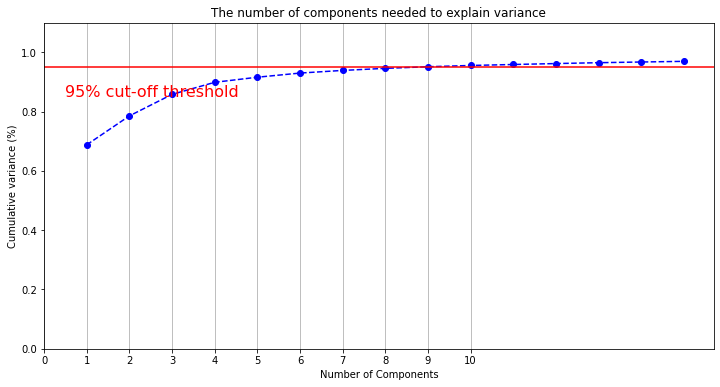

In [84]:
pca = PCA(n_components=15).fit(x)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [85]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

reg = LinearRegression().fit(principalDf, train_data['formation_energy_ev_natom'])
reg.score(principalDf,train_data['formation_energy_ev_natom'])

0.2737601806715847

In [86]:
pca.explained_variance_ratio_

array([0.68797027, 0.09746306, 0.07261114, 0.04070602, 0.01716595,
       0.01401086, 0.00893267, 0.00693118, 0.00546374])

In [96]:
dfcombined = pd.concat([train_data, principalDf], axis=1)
dfcombined2 = dfcombined.drop(['id','formation_energy_ev_natom','bandgap_energy_ev'],axis=1)
dfcombined2.head()

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,0,1,2,3,4,5,6,7,8
0,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,1.266167,-5.074385,-0.523717,0.667365,0.324748,-0.291364,1.100395,-0.059002,-0.637231
1,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.785164,-4.494853,-1.408193,1.407786,-0.077025,-0.957083,0.586136,0.097717,-0.215406
2,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,-9.230003,-0.900742,0.378320,2.000030,-0.510048,-0.639923,0.312105,0.435646,0.111697
3,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,-9.144699,0.431783,0.071304,0.413586,-0.084091,0.329072,-0.766430,-0.791730,0.533128
4,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,6.611587,0.237509,-0.767117,-1.665525,1.188080,0.361601,-0.238865,-0.389034,-0.419261


In [97]:
reg = LinearRegression().fit(dfcombined2, train_data['formation_energy_ev_natom'])
reg.score(dfcombined2,train_data['formation_energy_ev_natom'])

/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/simritajanakiraman/opt/anaconda3/envs/ml_project/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5801393769020612